#### Import torch

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models, transforms

#### Create a torch.nn module for CNN network

In [14]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels = 3,
                             out_channels = 16,
                             kernel_size = 5,
                             stride = 1,
                             padding = 2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        self.cnn2 = nn.Conv2d(in_channels = 16,
                             out_channels = 32,
                             kernel_size = 5,
                             stride = 1,
                             padding = 2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2)
        self.linear = nn.Linear(32*128*128, 7)
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

#### transform our images and normalise it for better model training

In [15]:
data_transforms = transforms.Compose([
    transforms.Resize([512,512]),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
data_dir = 'train'
image_datasets = datasets.ImageFolder(data_dir, transform = data_transforms)
train_loader = torch.utils.data.DataLoader(dataset = image_datasets,
                                          batch_size = 2,
                                          shuffle = True)
image_datasets.classes
labels_h = ('Circle', 'Rectangle', 'Triangle')
dataset_size = len(image_datasets)

#### Function to display image

In [16]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [19]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)
model = model.cuda()   #transfer model to GPU

In [20]:
num_epochs = 15
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.cuda())
        labels = Variable(labels.cuda())
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        print('epoch : {}, iter : {}, loss : {}'.format(epoch,i,loss.data[0]))

C:\Users\nEW u\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


epoch : 0, iter : 0, loss : 1.9076263904571533
epoch : 0, iter : 1, loss : 0.04459571838378906
epoch : 0, iter : 2, loss : 23.37029457092285
epoch : 0, iter : 3, loss : 3.6700189113616943
epoch : 0, iter : 4, loss : 2.1886749267578125
epoch : 0, iter : 5, loss : 1.1794997453689575
epoch : 0, iter : 6, loss : 1.2671167850494385
epoch : 0, iter : 7, loss : 0.8898130655288696
epoch : 0, iter : 8, loss : 4.212040424346924
epoch : 0, iter : 9, loss : 1.0826318264007568
epoch : 0, iter : 10, loss : 1.0465185642242432
epoch : 0, iter : 11, loss : 4.2695841789245605
epoch : 0, iter : 12, loss : 1.4393976926803589
epoch : 0, iter : 13, loss : 2.6247360706329346
epoch : 0, iter : 14, loss : 1.6923342943191528
epoch : 0, iter : 15, loss : 0.9634383320808411
epoch : 0, iter : 16, loss : 1.5901168584823608
epoch : 0, iter : 17, loss : 0.8159174919128418
epoch : 0, iter : 18, loss : 2.3270983695983887
epoch : 0, iter : 19, loss : 2.570387125015259
epoch : 1, iter : 0, loss : 1.0886796712875366
epoch

epoch : 8, iter : 10, loss : 0.017207860946655273
epoch : 8, iter : 11, loss : 0.00593256950378418
epoch : 8, iter : 12, loss : 0.007605075836181641
epoch : 8, iter : 13, loss : 0.02180957794189453
epoch : 8, iter : 14, loss : 0.035250186920166016
epoch : 8, iter : 15, loss : 0.006249904632568359
epoch : 8, iter : 16, loss : 0.011313199996948242
epoch : 8, iter : 17, loss : 0.025513887405395508
epoch : 8, iter : 18, loss : 0.008937597274780273
epoch : 8, iter : 19, loss : 0.02077484130859375
epoch : 9, iter : 0, loss : 0.017801761627197266
epoch : 9, iter : 1, loss : 0.012053489685058594
epoch : 9, iter : 2, loss : 0.015573263168334961
epoch : 9, iter : 3, loss : 0.011022806167602539
epoch : 9, iter : 4, loss : 0.0073089599609375
epoch : 9, iter : 5, loss : 0.004996776580810547
epoch : 9, iter : 6, loss : 0.0028967857360839844
epoch : 9, iter : 7, loss : 0.0034112930297851562
epoch : 9, iter : 8, loss : 0.026792287826538086
epoch : 9, iter : 9, loss : 0.015590429306030273
epoch : 9, it

#### Now to test our model with the test data

In [21]:
data_dir = 'test'
test_datasets = datasets.ImageFolder(data_dir, transform = data_transforms)
test_loader = torch.utils.data.DataLoader(dataset = test_datasets,
                                          batch_size = 1,
                                          shuffle = True)

In [22]:
model.eval()

CNNModel(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=524288, out_features=7, bias=True)
)

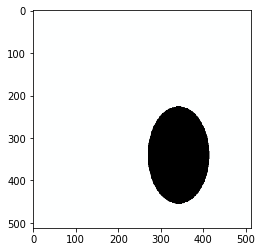

prediction -> Rectangle


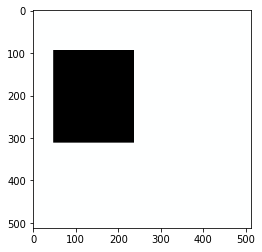

prediction -> Rectangle


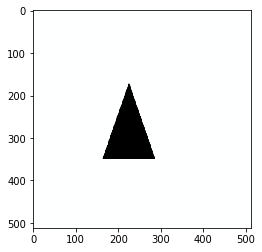

prediction -> Triangle


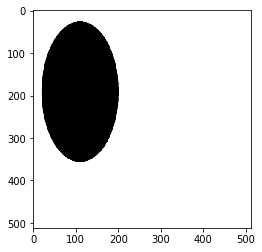

prediction -> Rectangle


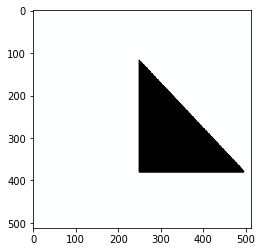

prediction -> Circle


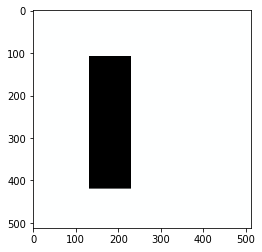

prediction -> Rectangle


In [23]:
for i, (images,labels) in enumerate(test_loader):
    imshow(torchvision.utils.make_grid(images))
    images=Variable(images.cuda())
    labels = Variable(labels.cuda())
    outputs = model(images)
    p,predicted = torch.max(outputs.data, 1)
    print('prediction -> {}'.format(labels_h[predicted[0]]))